# Eye of ML
Object detection with video cam written in Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

import torch
from torch import nn
from tqdm import tqdm

In [92]:
# cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)

In [93]:
if vc.isOpened():
    rval, frame = vc.read()
else:
    rval = False

In [105]:
vc.release()
cv2.destroyWindow("preview")

See how our frame looks like. 

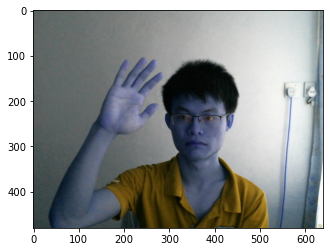

In [17]:
plt.imshow(frame)

In [21]:
??cv2.VideoCapture.read

Docstring:
read([, image]) -> retval, image
.   @brief Grabs, decodes and returns the next video frame.
.   
.       @param [out] image the video frame is returned here. If no frames has been grabbed the image will be empty.
.       @return `false` if no frames has been grabbed
.   
.       The method/function combines VideoCapture::grab() and VideoCapture::retrieve() in one call. This is the
.       most convenient method for reading video files or capturing data from decode and returns the just
.       grabbed frame. If no frames has been grabbed (camera has been disconnected, or there are no more
.       frames in video file), the method returns false and the function returns empty image (with %cv::Mat, test it with Mat::empty()).
.   
.       @note In @ref videoio_c "C API", functions cvRetrieveFrame() and cv.RetrieveFrame() return image stored inside the video
.       capturing structure. It is not allowed to modify or release the image! You can copy the frame using
.       cvClon

In [110]:
model = torch.hub.load("ultralytics/yolov5", "yolov5l6", pretrained=True)

Using cache found in C:\Users\Wabinab/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-7-18 torch 1.9.0+cu111 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264.0MB)



Fusing layers... 
Model Summary: 501 layers, 77218620 parameters, 0 gradients
Adding AutoShape... 


In [111]:
cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)

if vc.isOpened():
    rval, frame = vc.read()
else: 
    rval = False

for i in tqdm(range(1000)):
    results = model(frame)
    results.display(render=True)
    cv2.imshow("preview", frame)
    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 27:
        break
        
vc.release()
cv2.destroyWindow("preview")

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:18<00:00, 12.70it/s]


In [60]:
%timeit results = model(frame)

18.3 ms ± 629 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
%timeit np.array(results.imgs).squeeze()

41.4 µs ± 3.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
results = model(frame)

In [18]:
cv2.namedWindow("preview")
cv2.imshow("preview", results.imgs[0])

In [27]:
while True:
    results = model(frame)
    cv2.imshow("image", frame)  # results.imgs[0]
    cv2.waitKey(20)

KeyboardInterrupt: 

In [28]:
cv2.destroyWindow("image")

In [15]:
type(frame)

numpy.ndarray

In [16]:
type(results.imgs[0])

numpy.ndarray

In [69]:
np.count_nonzero(results.imgs[0] == frame)

14875

In [85]:
results.display()

In [97]:
results = model(frame)

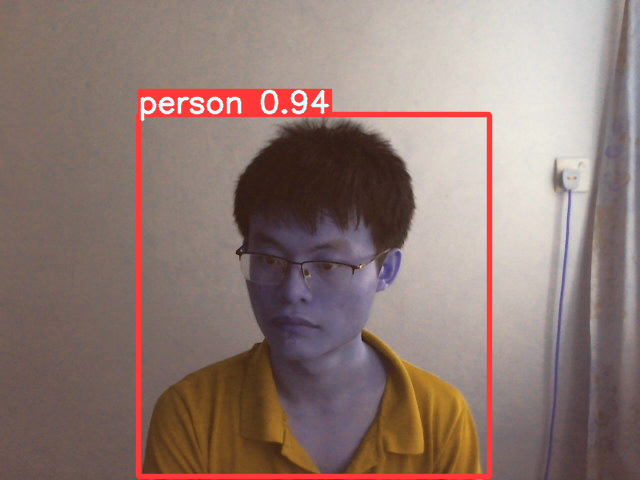

In [101]:
Image.fromarray(frame)

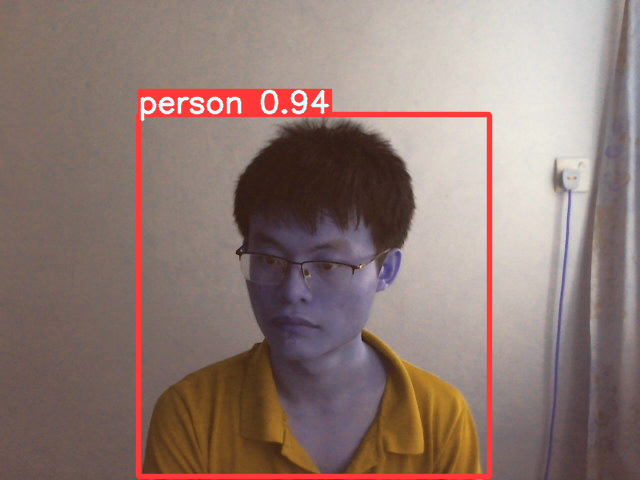

In [100]:
Image.fromarray(results.imgs[0])

In [99]:
results.display(render=True)

In [91]:
??results

Type:        Detections
String form: <models.common.Detections object at 0x000002018B4F7C10>
Length:      1
File:        c:\users\wabinab\.cache\torch\hub\ultralytics_yolov5_master\models\common.py
Source:     
class Detections:
    # YOLOv5 detections class for inference results
    def __init__(self, imgs, pred, files, times=None, names=None, shape=None):
        super(Detections, self).__init__()
        d = pred[0].device  # device
        gn = [torch.tensor([*[im.shape[i] for i in [1, 0, 1, 0]], 1., 1.], device=d) for im in imgs]  # normalizations
        self.imgs = imgs  # list of images as numpy arrays
        self.pred = pred  # list of tensors pred[0] = (xyxy, conf, cls)
        self.names = names  # class names
        self.files = files  # image filenames
        self.xyxy = pred  # xyxy pixels
        self.xywh = [xyxy2xywh(x) for x in pred]  # xywh pixels
        self.xyxyn = [x / g for x, g in zip(self.xyxy, gn)]  # xyxy normalized
        self.xywhn = [x / g for x, g in